In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
custome_date_parser = lambda x: datetime.strptime(x, '%y-%m-%d %H:%M:%S')
df_patient = pd.read_csv('clean_patient_info.csv', parse_dates= ['recording_date'], infer_datetime_format= True, index_col= 0)

In [3]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6428 entries, 0 to 6427
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   diagnosi                      6428 non-null   object        
 1   ecg_id                        6428 non-null   int64         
 2   ritmi                         6428 non-null   object        
 3   patient_id                    6428 non-null   float64       
 4   age                           6428 non-null   float64       
 5   sex                           6428 non-null   int64         
 6   height                        6428 non-null   float64       
 7   weight                        6428 non-null   float64       
 8   recording_date                6428 non-null   datetime64[ns]
 9   heart_axis                    4124 non-null   object        
 10  second_opinion                6428 non-null   bool          
 11  initial_autogenerated_report  

In [4]:
df_patient.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,recording_date,heart_axis,second_opinion,initial_autogenerated_report,validated_by_human,electrodes_problems,Age_Group,Height_Group,Weight_Group
0,STACH,10900,VA,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
1,AFLT,10900,AF,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
2,SR,8209,SR,12281.0,55.0,0,166.796356,69.841845,1992-06-09 15:52:36,LAD,False,False,True,no,"(0, 55]","(166, 167]","(60, 70]"
3,STACH,17620,VA,2007.0,29.0,1,164.000000,56.000000,1997-02-08 18:33:30,NaN,False,False,True,no,"(0, 55]","(90, 166]","(50, 60]"
4,SBRAD,12967,VA,8685.0,57.0,0,166.796356,69.841845,1994-09-13 10:21:14,MID,False,True,False,no,"(55, 70]","(166, 167]","(60, 70]"


In [5]:
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}

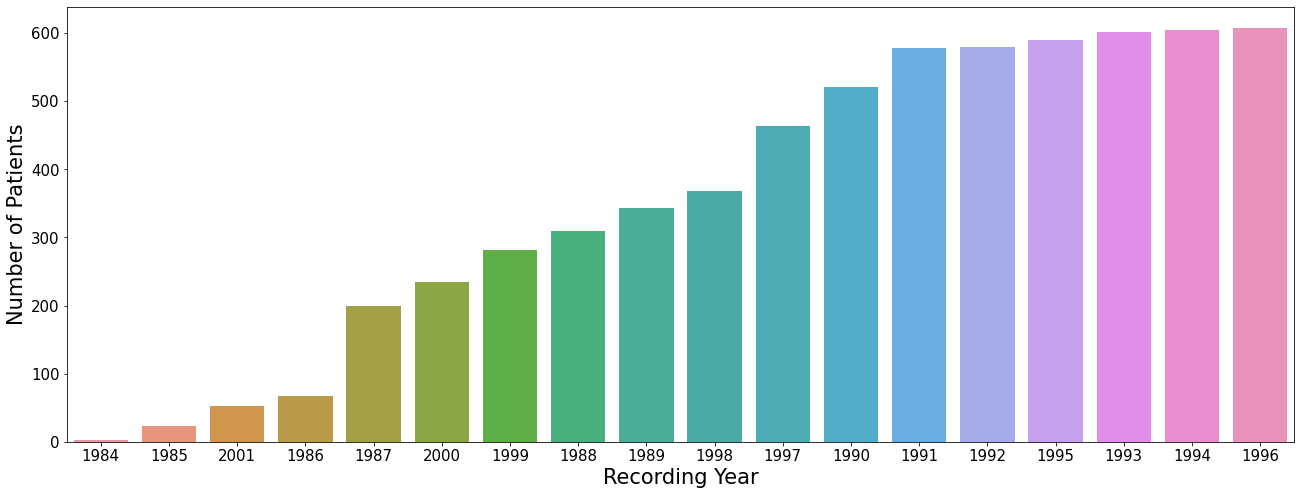

In [6]:
fig, ax = plt.subplots(figsize= (22, 8))
g= sns.countplot(x=df_patient['recording_date'].dt.year, ax= ax, order= df_patient['recording_date'].dt.year.value_counts(ascending= True).index)

ax.set_xlabel('Recording Year', fontdict= axis_label)
ax.set_xticklabels(ax.get_xticklabels(), fontdict= ticks_label)

_= ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.tick_params(axis= 'both', labelsize= 15)



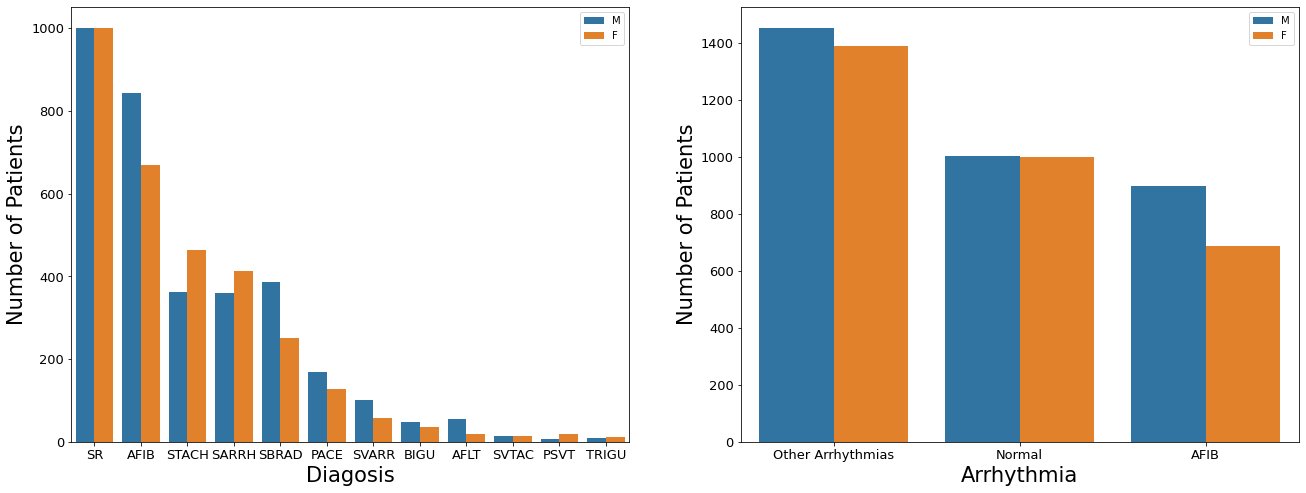

In [7]:
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}
fig, (ax1, ax2) = plt.subplots(figsize= (22, 8), ncols= 2, nrows= 1)
g1= sns.countplot(x= 'diagnosi', data= df_patient, ax= ax1, hue= 'sex', order=df_patient.diagnosi.value_counts().index)
g2= sns.countplot(x= 'ritmi', data= df_patient, ax= ax2, hue= 'sex', order= df_patient.ritmi.value_counts().index)


ax1.set_xlabel('Diagosis', fontdict=axis_label)
ax2.set_xlabel('Arrhythmia', fontdict= axis_label)

ax1.set_ylabel('Number of Patients', fontdict= axis_label)
ax2.set_ylabel('Number of Patients', fontdict= axis_label)

ax2.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax1.tick_params(axis= 'both', labelsize= ticks_label['size'])
ax2.tick_params(axis= 'both', labelsize= ticks_label['size'])

legend_text = ['M', 'F']

ax1.legend(legend_text)
ax2.legend(legend_text)

The plots show that Atrial fibrilation (AFIB) is the most common form of Arrhythmia.

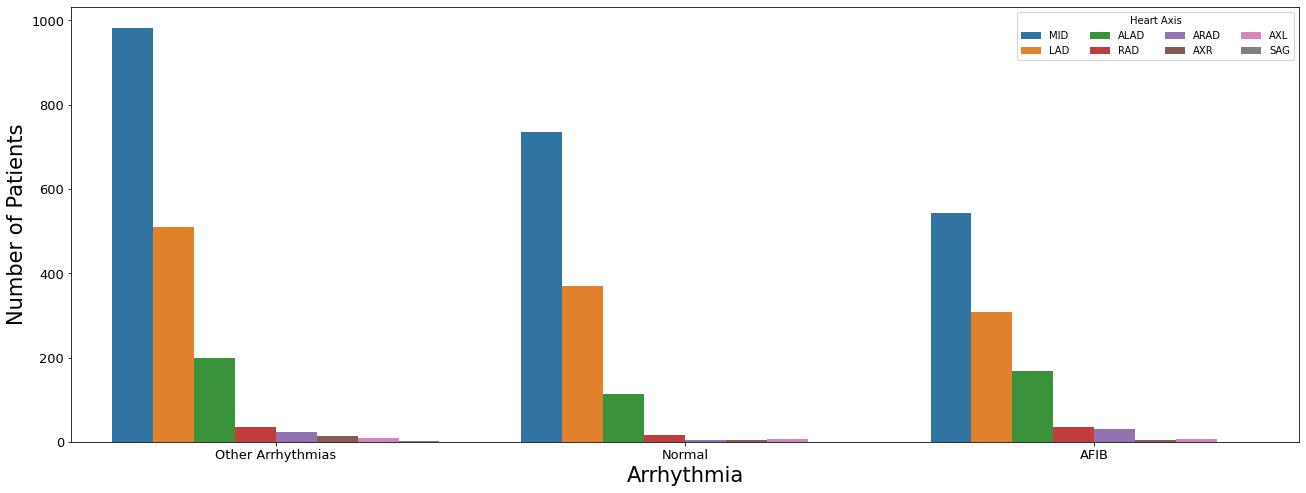

In [8]:
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'ritmi', data= df_patient, ax= ax, hue= 'heart_axis', order= df_patient.ritmi.value_counts().index)

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=4, title= "Heart Axis")

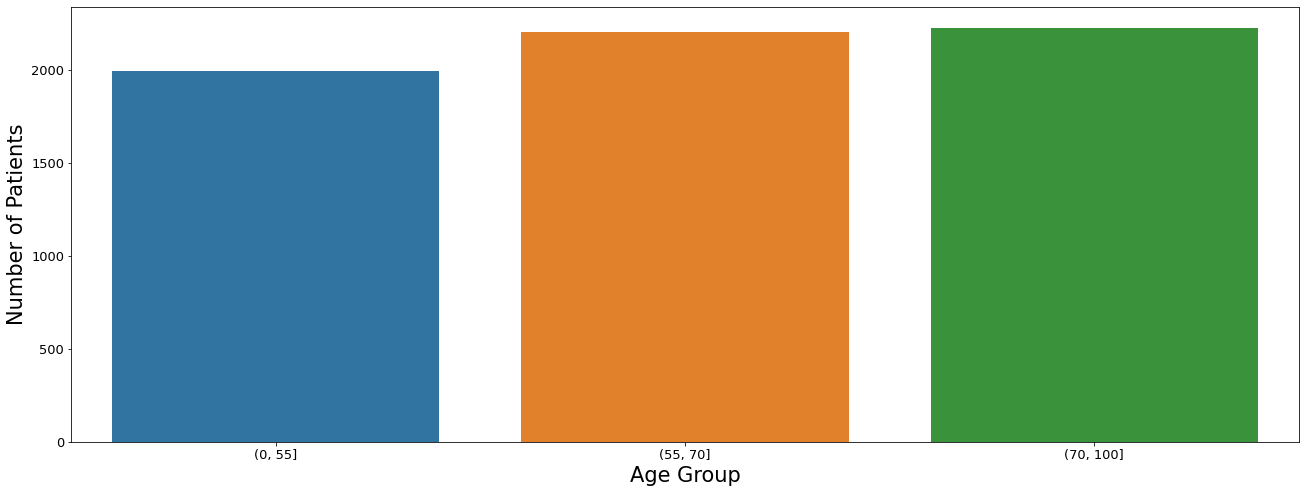

In [9]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Age_Group', data= df_patient, ax= ax)

ax.set_xlabel('Age Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])



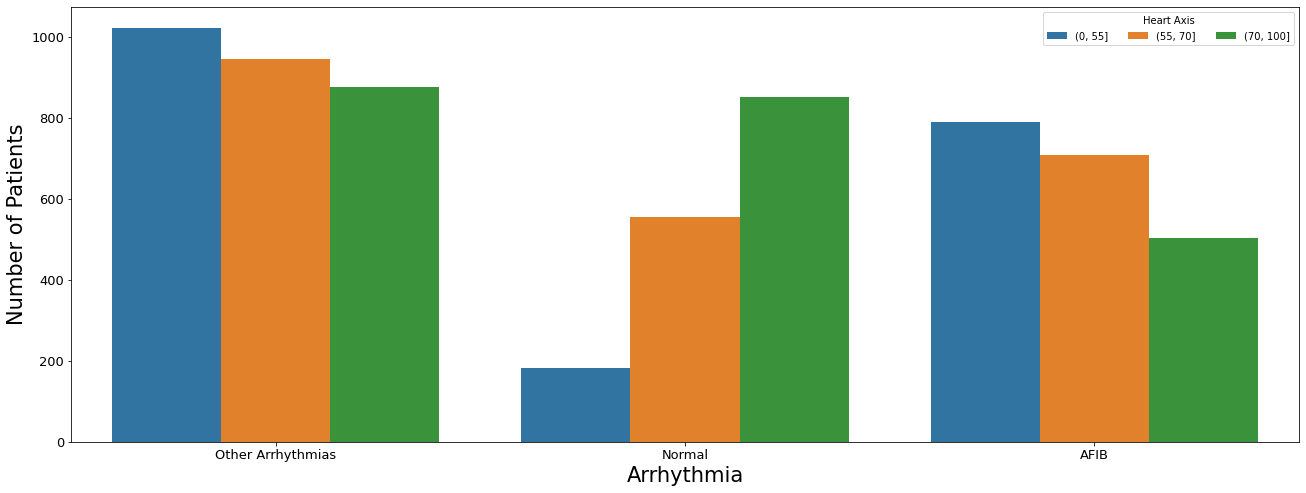

In [10]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'ritmi', data= df_patient, ax= ax, hue= 'Age_Group')

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=3, title= "Heart Axis")

Interesting result. Looks like younger people tend to have some kind of Arryhythmia. It's possible that on the onset of arryhumthmia it gets treated immediately or they may not live long enough.

In [11]:
df_patient.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,recording_date,heart_axis,second_opinion,initial_autogenerated_report,validated_by_human,electrodes_problems,Age_Group,Height_Group,Weight_Group
0,STACH,10900,VA,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
1,AFLT,10900,AF,15654.0,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,False,True,False,no,"(0, 55]","(166, 167]","(60, 70]"
2,SR,8209,SR,12281.0,55.0,0,166.796356,69.841845,1992-06-09 15:52:36,LAD,False,False,True,no,"(0, 55]","(166, 167]","(60, 70]"
3,STACH,17620,VA,2007.0,29.0,1,164.000000,56.000000,1997-02-08 18:33:30,NaN,False,False,True,no,"(0, 55]","(90, 166]","(50, 60]"
4,SBRAD,12967,VA,8685.0,57.0,0,166.796356,69.841845,1994-09-13 10:21:14,MID,False,True,False,no,"(55, 70]","(166, 167]","(60, 70]"


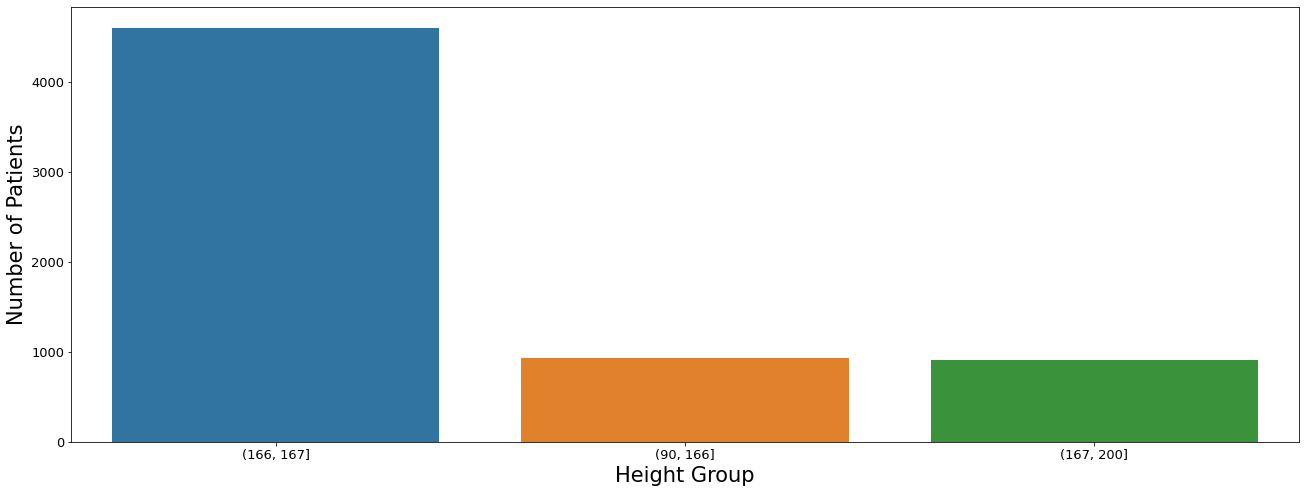

In [12]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Height_Group', data= df_patient, ax= ax)

ax.set_xlabel('Height Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

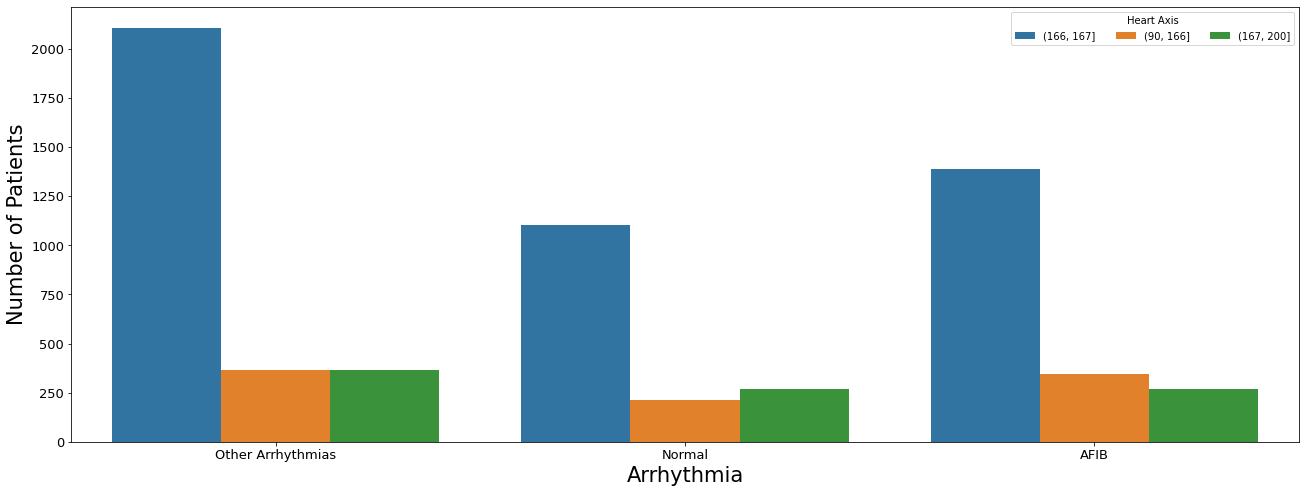

In [13]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'ritmi', data= df_patient, ax= ax, hue= 'Height_Group')

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=3, title= "Heart Axis")

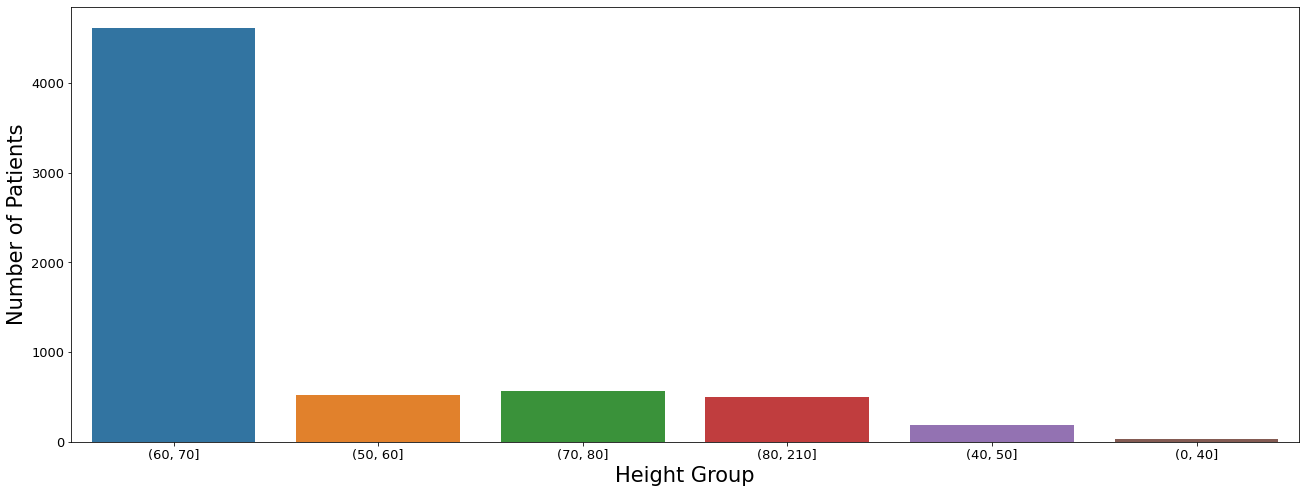

In [14]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Weight_Group', data= df_patient, ax= ax)

ax.set_xlabel('Height Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])